<a href="https://colab.research.google.com/github/Avit-hodibu/Convolutional_Neural_Network/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolution Neural Network:**

CNN are special kind of NN for processing data that has a known grid-like topology like time series data(1D) or images(2D).

In CNN, there is convolution layer which perform operation known as convolution operation.

In the architecture, if you you see convolution layer then it is CNN.

In CNN, you see 3 types of layers:

1. convolution layer
2. pooling layer
3. full connected(FC) layer: this is happen in ANN also

**Why not use ANN?**
- high computation cost:if we have image as data 40 * 40 pixels then we convert that 40 * 40 pixels data to 1-D array then it become input of 1600 pixels. And if we have next 100 neuron hidden layer then it's weight is 1600 * 40 and bias 100. IT is take too much computation cost. just in 40 * 40 it take so much computation imagine in bigger pixels data. So, ANN is not use.

- overfitting: It work on each pixel so there is high chance of getting overfit with training data.
- loss of important info like spatial arrangement of pixels: when change image to 1 D the object  in image changes the distance. For example image of dog: the distance of nose and mouth will be change when we make onto 1 D array



**CNN intuition**

We have a image. We need to predict that in image is there written '9' or not.

Image is a collection of pixels. people can write 9 in different way. We have to predict these all ways of writing 9

For example what humam do? we search for feature or pattern. In 9 there is need to be circle and one vertical line and one horizental line then there is a great chance this is 9.

Similary, when we provide these images CCN try to take out some primitive features like edges. By adding layer by layer these features they try to make some complex features.

CNN have convolution layers that are basically filters. Filter work is to extract features

In image we move filter and search features. When we found pattern or feature, then these feature that are match become activated. Then we send this activate features to convolution layer. This convolution layer merge previous features and make complex and meaningful features. we repeat this.

Image -> filter -> premitive features extract -> convolt -> more complex features extract -----> eventual you have feature to detect


**Application:**
- object detection
- location
- face recogniation
- image segementation
- up-lift image
- posture detection


CNN is inspired from visual cortex.

# Convolution Operation

It is a special NN whose architecher is slighly different from ANN. Because it has different layer
1. convolution layer
2. pooling layer
3. fully connect layer (dense layer)

It work great with images because it is based on visual cortex.

The work of CNN starting layer is to detect edge. This is called premitive features. As you move forward the work of convolution layer is to match edges and make complex features. And you move forward so classify the image

**Images**

GreyScale-> B/W

RGB -> colored image

In greyscale: Here is 1 channel.
we assign between 0-255 in each pixel.
0 is black and 255 is white. sometime we normalized 0 is black and 1 is white. When we say image process means 2D arrays or 2D numpy array.

In color image: 3 channels -(Red, Green, Blue). Each channels color act as a one sheet of color.


**Edge Detection(Convolution Operation)**

Edges are change in intensity (change in color).


We have image. to do convolution we have filter/kernal which is matrix (most of
time 3 * 3 matrix or greater than that). When we do multiplication of image and filter, it gives features map

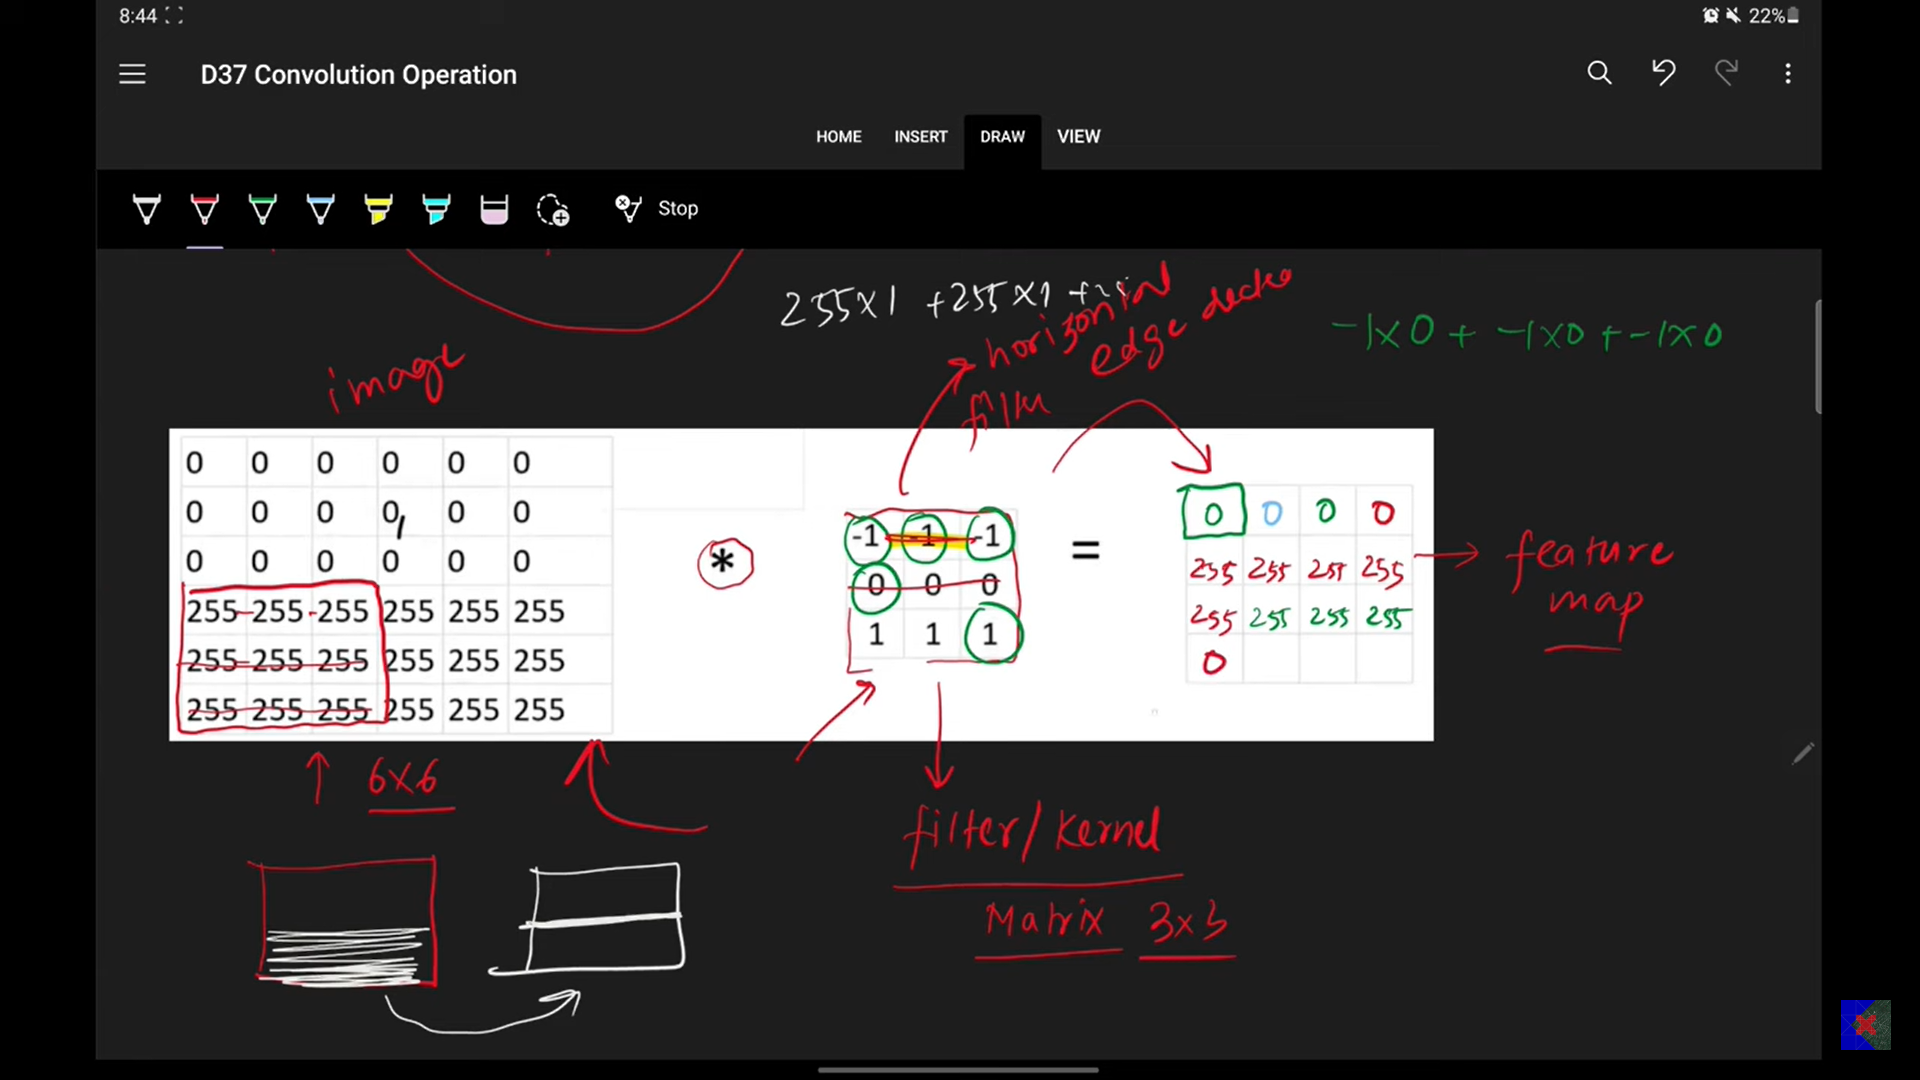

For vertical(filter) edge detector we multiply by:

[ -1 0 1 ]

[ -1 0 1 ]

[ -1 0 1 ]

But, in DL, we initialized filter by random value and our CNN do backpropagation through determine the value of filter. It is like weight in ANN.

if image (n * n) and filter (m * m) then ouput it give is ((n-m+1) * (n-m+1))

If in grayscale filter is 3 * 3 then in RGB 3 * 3 * 3 because each color has different different channel so n * n * 3. the feature map will be single channel in RGB.

pixel (n * n * c) * filter (n * n * c) = feature (n-m+1)(n-m+1)/single channel

Multiple filter:

Almost all the we apply multiple filter to get different features. So, each filter give seperate feature. It act as multiple channel to next convolution layer

# Padding and Strides

The problem with CNN is
- each time you apply filter, the size will keep on decreaseing . In short you will lose information.
- side part of image become less involve than middle part of image pixel during convolution. This means importance of side pixel will be less than middle. If the information is in side part then we may miss it.

These problem is slove by padding

**padding:**
In padding what we do is add extra pixel to all side (top, bottom, left, right) so, the size of the image wont shrink when applying filter and lost the imformation. padiing value is zero (also called zero padding)

n * n is image then (n+2p * n+2p) after padding if the filter is (m * m) then (n+2p-m +1 ) * (n+2p-m +1 )

Keras: has two: valid(no padding) and same(padding it will automatically adjust)

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras import Sequential
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1)))
# 32 = number of filter, kernel size= size of filter, padding = valid not extra padding is added
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(Flatten()) # convert data to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
# 32 = number of filter, kernel size= size of filter, padding = same extra padding is added
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Flatten()) # convert data to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

**Strides**

move by 1 pixel then it is called stride=1

move one pixel to the right and one pixel to the bottom for convolution operation. This means (1,1) strides.

Now, n * n pixel image and m * m filter and has (s,s) stride and padding p then feature map will be:

floor operation. that means 1.9 is also 1 and 1.1 is also 1 : ((n +2p - m)/s)+1

As you increase the strides, your feature map size will decrease. you may lose some information.

if stride is greater than 1 then it called strided convolution

if filter size more that convolution then no operation is perform

Why use stride?
- high level features: when we donot wanr low levek features then we use
- computing: faster compution because less operation is need to be done



In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu', input_shape=(28,28,1)))
# 32 = number of filter, kernel size= size of filter, padding =same means 1 , strides (2,2) means move by 2 right and 2 bottom
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', strides=(2,2), activation='relu'))
model.add(Flatten()) # convert data to 1D
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)

# Pooling

The problem with Convolution:
1. Memory issue : imagine is 228 * 228 * 3 RGB image and applying 100 of filter(3,3)  this will create feature map (226 * 226) * 100. And we choose 32 bit floating value to store this. Then, (226 * 226) * 100 * 32 = 19.5 MB for one image. if we do batch 100 training image then it will take 1.5 GB. This will cause memory issue
2. Translation variance: feature will dependent on location. cat in right bottom conner is different then cat on the left top conner because it depend on location.

What we need is translation invariance. It should not depend of location of the object

Pooling is a way to down sample your feature map because of it feature become translation independent. It doesnot treat differently the object according to location.  

After convolution layer, we add pooling layer.

In feature map, we add non-linearity to make non-linear feature map. After this, we add pooling


Different types of pooling:
1. Max pooling
2. Mean
3. average
4. L2  
5. Global pooling

After conv, we have to tell 3 thing for pooling:

Let's:
1. Size of pooling : size = 2,2
2. stride : 2
3. type : max

then we pick 2 * 2 matrix from convoluted feature map and take out the maximum value among them. Then take it in new pooling feature map. we move by 2 strides and do same picking 2 * 2 matrix and select the max. We repeat this process and make new feature map pooled.  

What we are doing is in a small field we are picking the most dominent field. Internally, in a receptive field we are picking most doiminit. We can say we are eliminating the low level details and selecting high level details. Because of this, there comes translation invariance. this is how pooling works.

If you have multiple feature maps we apply pooling individual feature map and have multiple pooled map.

In pooling, we donot have trainable operator.


In [11]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')) # we are doing max_pooling
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

**AvgPooling:**
we will calculate the average of pooling area or receptive field

**Global pooling:**
It is use in the end when you flatten it pass to fully connected layer, you can use in replacement of flatten. It is used to reduce overfitting.
It have two types: Global max and Global avg.

Global max pooling: it will take the value of entire featured map that come from covolution operation and select one max value from it and make 1 * 1 scalar value.

Global avg pooling : It will take the average of all the entire feature map and give only 1 ouput


Advantage:
- reduced size
- translation invariance: where is that feature doesnot matter feature is there matter.
- Enhanced features(only in case of Maxpooling): we pick small field called receptive field. In max pooling, we pick the most dominent among them. This make enhance
- No need of training: we only need to aggregated.

Disadvantage:

- image segmentation: where image need to in specific location.
- you lose alot of imformation.

# CNN Architecture

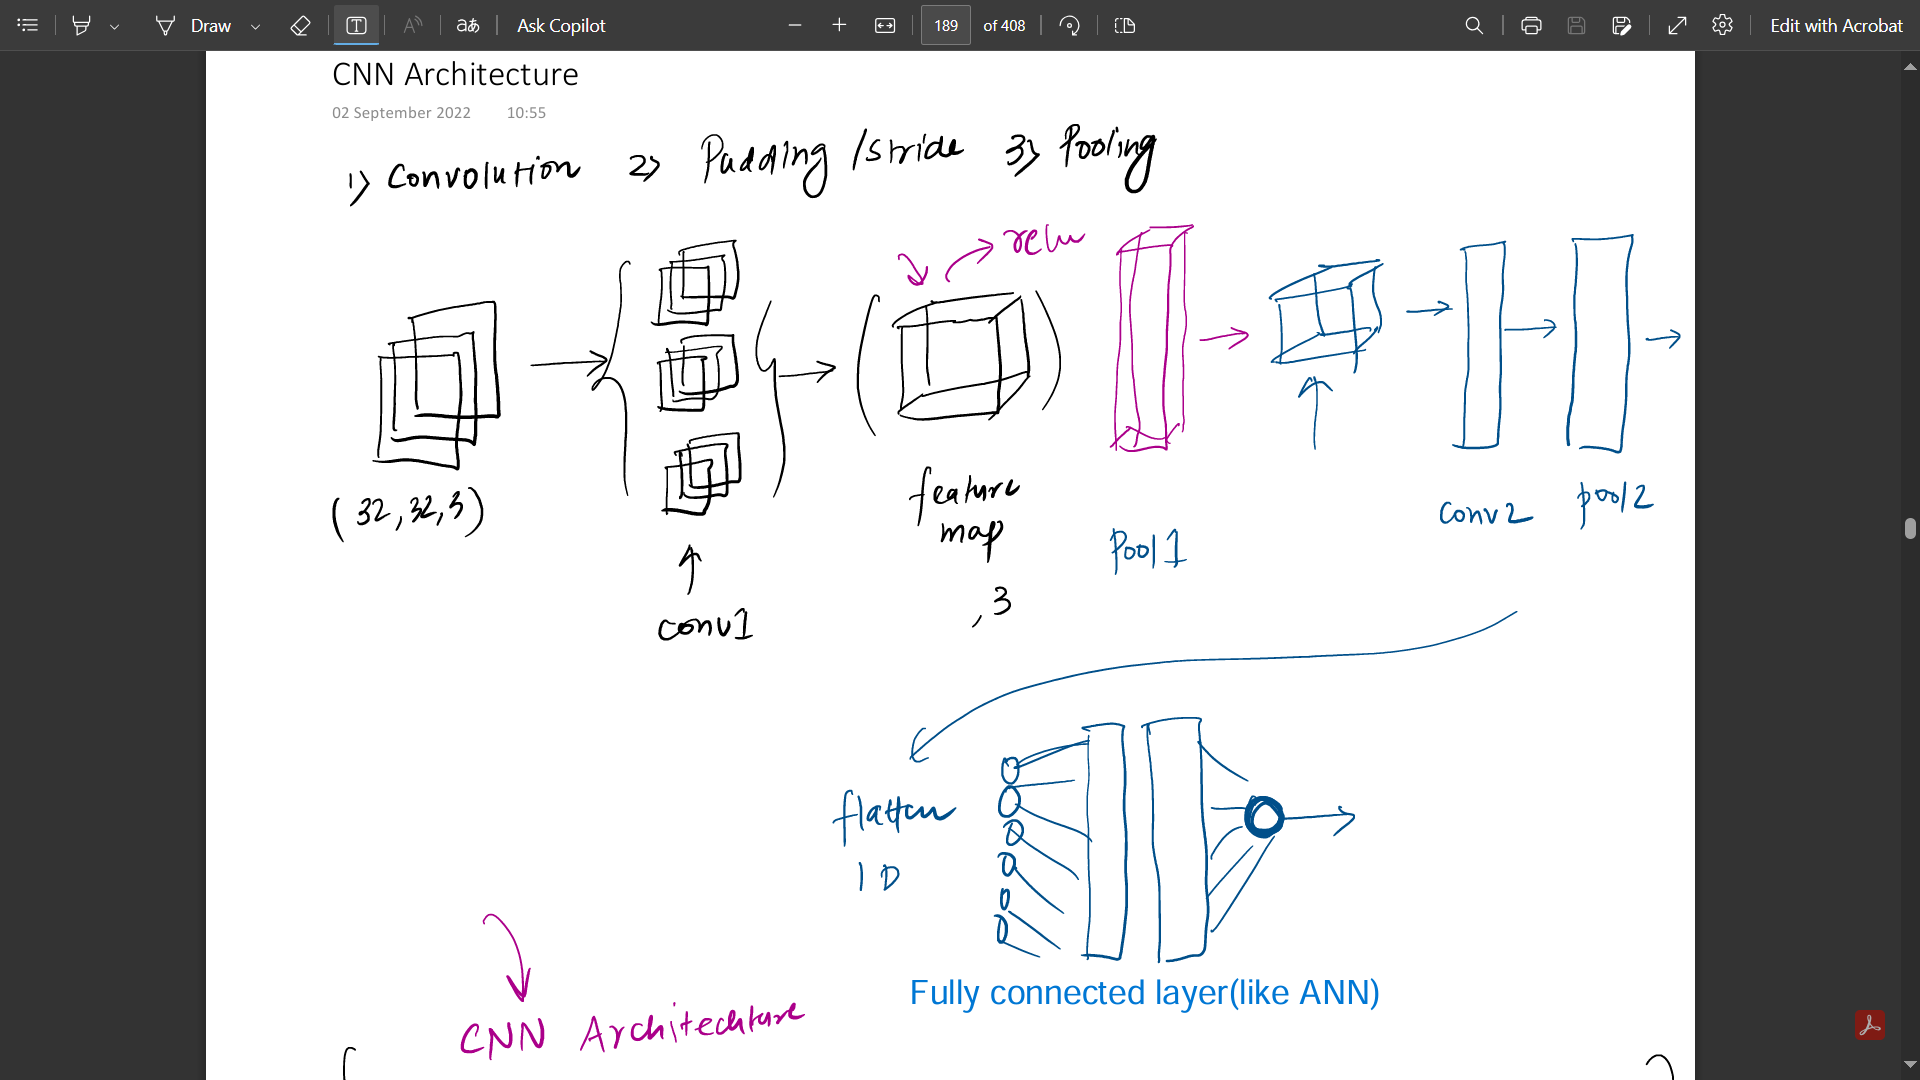

We pass image through convolution layer then pooling layer. we can again use con the pooling repeatedly. The tensor we get then, flatten. then it will pass to fully connected layer (ANN) and we get output.

**LeNET**


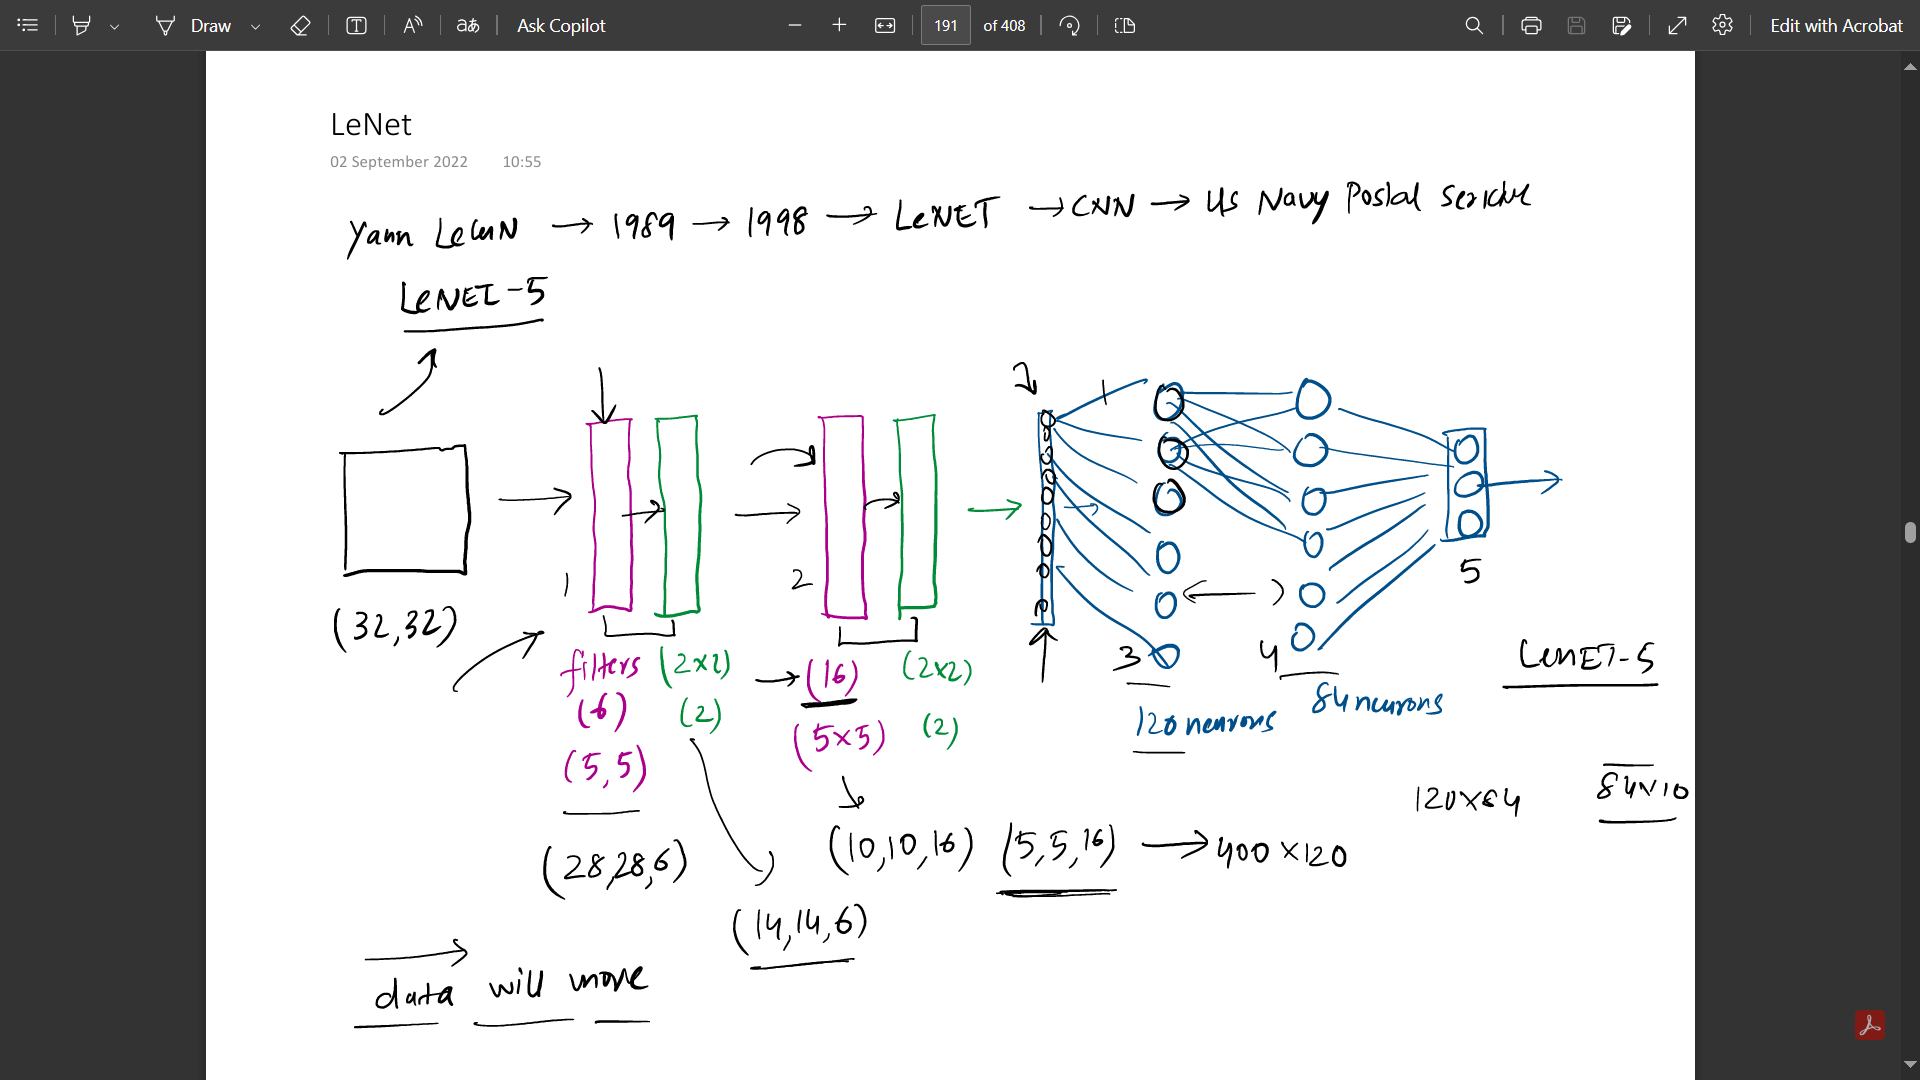

In [12]:


model = Sequential()
#1
model.add(Conv2D(6, kernel_size=(5, 5), padding='valid', activation='tanh', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))
#2
model.add(Conv2D(16, kernel_size=(5, 5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
#3
model.add(Dense(120, activation='tanh'))
#4
model.add(Dense(84, activation='tanh'))
#5
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)